# Data Science - Laboratorio 1 - Series de tiempo
## Dataset: Monthly Mean Temperature

Sofia Velasquez 22049

José Marchena 22398

### 0. Obtencion de datos

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
mean_temp = pd.read_csv(
    './data/monthly-mean-temp.csv', 
    parse_dates=['Month'], 
    index_col='Month',
    date_parser=dateparse
)
print(mean_temp.shape)


(240, 1)


C:\Users\50250\AppData\Local\Temp\ipykernel_26032\3828989619.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  mean_temp = pd.read_csv(


### 1. Analisis Exploratorio

Description
       Temperature
count   240.000000
mean     49.041250
std       8.569705
min      31.300000
25%      41.550000
50%      47.350000
75%      57.000000
max      66.500000
Frequency distribution


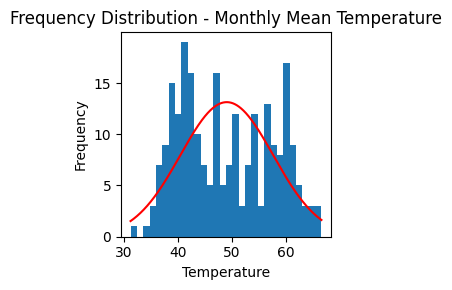

Time Series


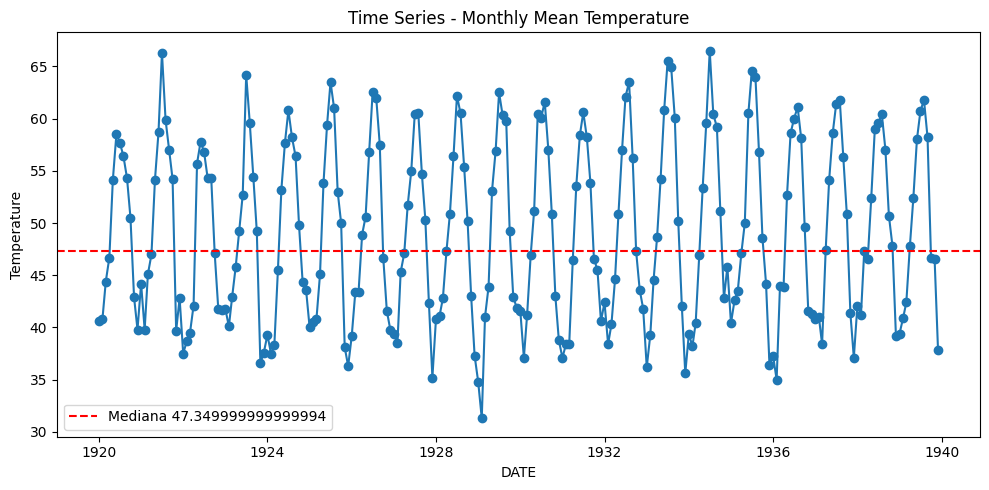

Seasonal Decompose


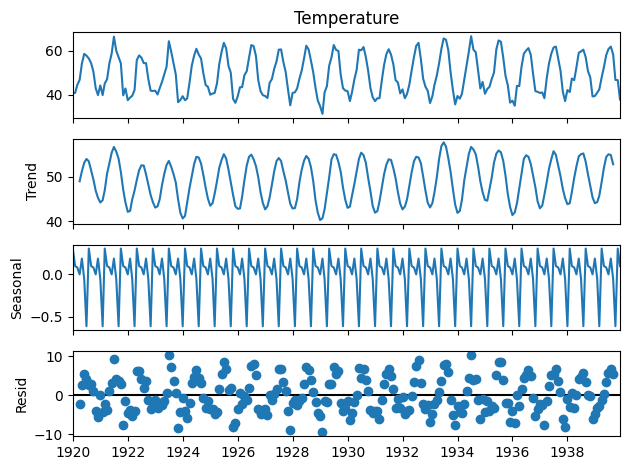

In [3]:
from scripts import analysis_graphs

value = "Temperature"
title = "Monthly Mean Temperature"

analysis_graphs(
    mean_temp,
    value,
    title
)

### 2. Moving Average

ACF plot


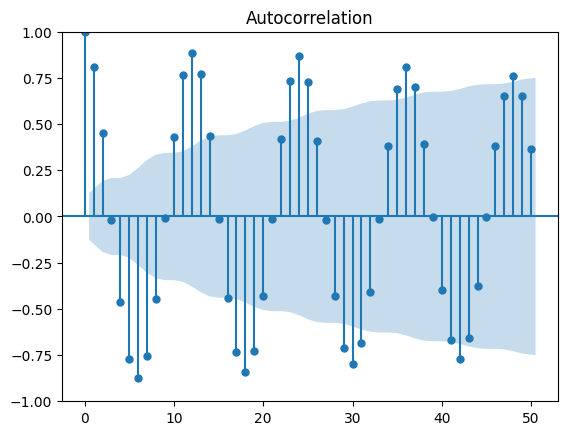

Finding Best Period
Best Lag is 11 with weight of 0.8841860709388742
Moving Average Graph


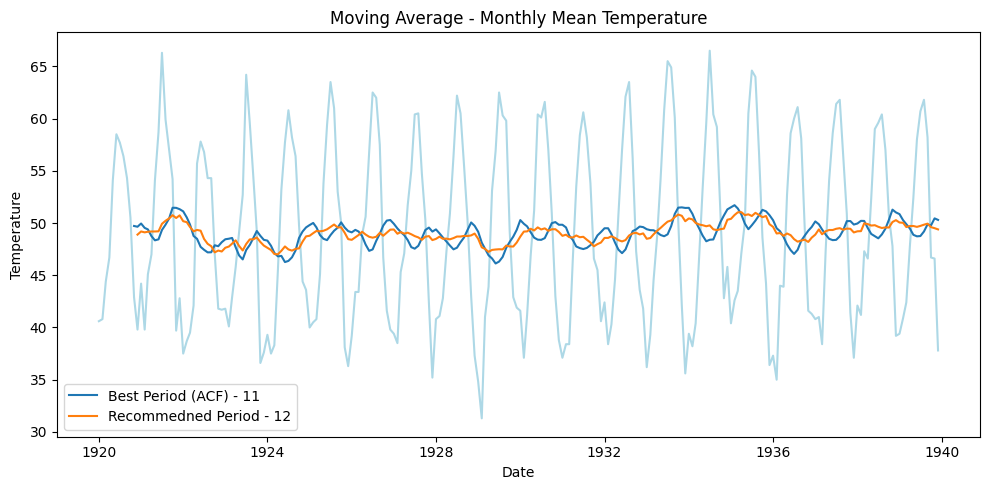

In [4]:
from scripts import moving_average

moving_average(mean_temp, value, title, 12)

### 5. Modelo SARIMA 

C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\50250\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


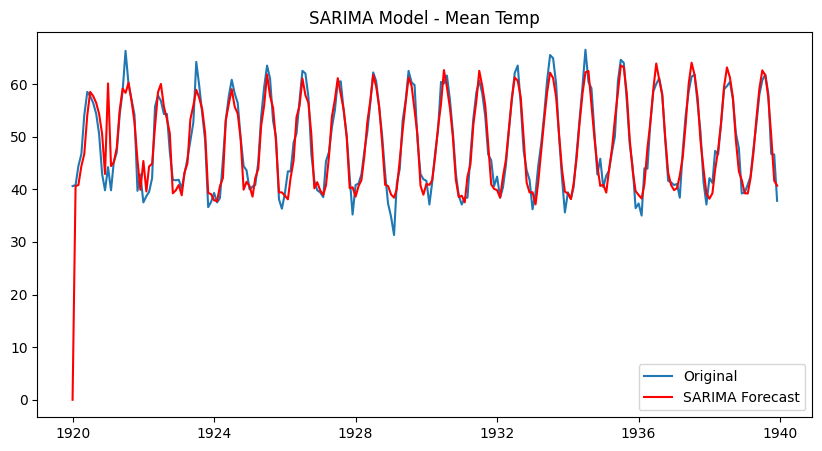

Mean Temp - SARIMA MSE: 14.29, MAE: 2.21


In [15]:
from scripts import sarima_model

mean_temp.reset_index(inplace=True)  # Pasa Month como columna normal y no cómo índice
sarima_model(mean_temp.copy(), 'Month', 'Temp', order=(1,1,1), seasonal_order=(1,1,1,12), title="Mean Temp")
